In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data= pd.read_csv("chap5_data.csv")
data.dtypes

y      int64
x    float64
f     object
dtype: object

In [3]:
#xモデルの最大尤度
x_model = smf.glm('y~x',data=data,family=sm.families.Poisson())
x_result = x_model.fit()
x_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 24 Feb 2020   Deviance:                       84.993
Time:                        15:39:55   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [4]:
#一定モデルの最大尤度
const_model = smf.glm('y~1',data=data,family=sm.families.Poisson())
const_result = const_model.fit()
const_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 24 Feb 2020   Deviance:                       89.507
Time:                        15:39:59   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [5]:
#尤度比の計算
np.exp(const_result.llf)/np.exp(x_result.llf)

0.10466708976326916

In [6]:
#検定統計量としては尤度比ではなく逸脱度の差を用いる
#この4.513...が統計的に有意な差なのかを検定するのが目的
const_result.deviance - x_result.deviance

4.513941078851801

#### PB（パラメトリックブースト）法

In [9]:
beta1 = np.exp(const_result.params[0])
beta1

7.830000000000001

In [10]:
#一定モデルが真の分布と仮定する
#真の分布である一定モデルから取得するサンプルデータを考える
sample_data = np.random.poisson(np.exp(const_result.params[0]), 100)
sample_data

array([ 7,  8,  4,  8,  7,  9,  7,  7,  8,  6, 10,  2,  8,  9,  6,  9,  6,
        7,  9,  9,  2, 11,  7, 11,  5,  5,  7, 13,  8,  2,  9, 14, 10,  7,
       10,  5,  6, 12, 13,  9,  7,  7, 12, 12,  5,  7,  8,  7,  5, 10,  7,
       11,  6,  5,  6,  5, 11,  2,  7,  7,  7, 13, 10,  7,  9,  8,  6,  7,
        8,  9,  7,  7,  8,  7,  8,  7, 11,  8,  9,  7, 12,  7,  9,  8,  8,
        5,  9, 12,  6,  5,  9, 14,  7,  8, 10,  8,  7,  8,  8, 10])

In [11]:
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [19]:
#サンプルデータ1000個に対して一定モデルとxモデルそれぞれの逸脱度の差を考える
#dataのxは本ページ冒頭で読み込んだ値と共通にする
#そのためサンプルデータはデータに新規に列を追加して管理する
deviance_list = []

for i in range(0, 1000):
    data['const_model'] = np.random.poisson(np.exp(const_result.params[0]), 100)
    x_model = smf.glm('const_model~x',data=data,family=sm.families.Poisson())
    x_deviance = x_model.fit().deviance
    const_model = smf.glm('const_model~1',data=data,family=sm.families.Poisson())
    const_deviance = const_model.fit().deviance
    deviance_list.append(const_deviance - x_deviance)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 224., 108.,
         80.,  59.,  56.,  46.,  42.,  33.,  32.,  31.,  27.,  17.,  18.,
         27.,  14.,  14.,  13.,  12.,  11.,   9.,   7.,   8.,   7.,   7.,
          3.,   6.,   4.,   4.,   6.,   3.,   5.,   6.,   1.,   7.,   2.,
          2.,   6.,   2.,   6.,   1.,   3.,   1.,   1.,   3.,   3.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   2.,   1.,   0.,   3.,   0.,
          1.,   0.,   2.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-1.  , -0.89, -0.78, -0.67, -0.56, -0.45, -0.34, -0.23, -0.12,
        -0.01,  0.1 ,  0.21,  0.32,  0.43,  0.54,  0.65,  0.76,  0.87,
         0.98,  1.09,  1.2 ,  1.31,  1.42,  1.53,  1.64,  1.75,  1.86,
         1.97,  2.08,  2.19,  2.3 ,  2.41,  2.52,  2.63,  2.74,  2.85,
         2.96,  3.07,  3.18,  3.29

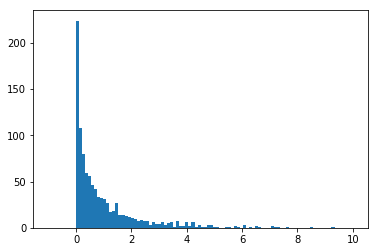

In [20]:
plt.hist(deviance_list, bins=100, range=(-1,10))

### PB法におけるP値の取得
* 解析的にP値を求める代わりにサンプリングする

In [21]:
#サンプリングするためP値は一定ではない
array = np.array(deviance_list)

In [22]:
#逸脱度の差が4.5以上になるのは31/1000 = 0.031(3.1%)
#これは有意水準の0.05(5%)よりも小さい
#よって「一定モデルが真」という帰無仮説は棄却される
#帰無仮説が真の場合3.1%という有意水準以下でしか発生しない
np.count_nonzero(array > 4.5)

31

### χ2乗分布

In [7]:
#χ2乗分布に関しては記載が少ない
#こちらだと一撃で求められるらしい
#ただしデータ数が多いのが前提となる
#データ数が少ない場合はPB法を採用する
chi = pd.Series(np.random.chisquare(1,1000))

print(chi[chi>=4.5].shape[0] / 1000)
print(chi.quantile(0.95))

0.042
3.8967869662585826
